<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab11_sna_college_peers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 13: SNA with colleges and universities
## Scott Spurlock
### 3-24-2021

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

from collections import Counter
import operator
from operator import itemgetter


In [ ]:
fn = 'https://drive.google.com/uc?export=download&id=1cwiW8N13ueTSDfjkJQ9BIK1Nvev3M4e4'
df = pd.read_csv(fn)
df

,orgname,selected_peers_concat
0,Abilene Christian University,Alaska Pacific University|Azusa Pacific Univer...
1,Abraham Baldwin Agricultural College,Gordon College|Middle Georgia College|Iowa Lak...
2,Adams State College,Arizona State University|Northern Arizona Univ...
3,Adelphi University,University of San Diego|University of San Fran...
4,Adirondack Community College,Cayuga County Community College|Clinton Commun...
...,...,...
1680,York Technical College,Aiken Technical College|Technical College of t...
1681,Young Harris College,LaGrange College|Reinhardt University|Brevard ...
1682,Youngstown State University,University of Arkansas at Little Rock|Central ...
1683,Yuba College,American River College|Butte College|Cosumnes ...


In [ ]:
nodes = df['orgname']
nodes.head()

0            Abilene Christian University
1    Abraham Baldwin Agricultural College
2                     Adams State College
3                      Adelphi University
4            Adirondack Community College
Name: orgname, dtype: object

In [ ]:
edges = []

for index, row in df.iterrows():
  #print(row)
  curr_school = row['orgname']
  peers = row['selected_peers_concat'].split('|')
  for peer in peers:
    edges.append( (curr_school, peer) )

edges[:5]

[('Abilene Christian University', 'Alaska Pacific University'),
 ('Abilene Christian University', 'Azusa Pacific University'),
 ('Abilene Christian University', 'California Baptist University'),
 ('Abilene Christian University', 'California Lutheran University'),
 ('Abilene Christian University', 'Chapman University')]

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
print(nx.info(G))


Name: 
Type: DiGraph
Number of nodes: 3320
Number of edges: 37850
Average in degree:  11.4006
Average out degree:  11.4006


In [ ]:
# Ratio of edges to possible edges. For a directed graph, there could be
# 2 edges for every pair of nodes.
density = nx.density(G)
print('Network density:', density)

density_manual = G.number_of_edges() / (G.number_of_nodes() * (G.number_of_nodes()-1))
print('Manually calculated density:', density_manual)

Network density: 0.0034349510122442164
Manually calculated density: 0.0034349510122442164


## Density observations
The manual calculation is number of edges divided by the total possible edges, which is n * (n-1), since each
node could be connected to all the other nodes. This density of 0.003 is very small (sparse graph), meaning
most schools are not connected to each other (i.e., didn't list each other as peers).

In [ ]:
in_degree_dict = dict(G.in_degree(G.nodes()))
nx.set_node_attributes(G, in_degree_dict, 'in_degree')

out_degree_dict = dict(G.out_degree(G.nodes()))
nx.set_node_attributes(G, out_degree_dict, 'out_degree')

betweenness_dict = nx.betweenness_centrality(G) 
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

eigenvector_dict = nx.eigenvector_centrality(G) 
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')


In [ ]:
schools = ['Elon University', 'University of North Carolina at Charlotte', 'Harvard University']

for school in schools:
  print(school)
  print(G.nodes[school])
  print()


Elon University
{'in_degree': 55, 'out_degree': 11, 'betweenness': 0.0004957983905059715, 'eigenvector': 0.0050464177231364675}

University of North Carolina at Charlotte
{'in_degree': 31, 'out_degree': 16, 'betweenness': 0.001274218409573395, 'eigenvector': 0.0034423693025882576}

Harvard University
{'in_degree': 25, 'out_degree': 3, 'betweenness': 9.848425656919905e-08, 'eigenvector': 0.09897685840674143}



In [ ]:
sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by in-degree:")
for d in sorted_in_degree[:10]:
  print(d)

Top 10 nodes by in-degree:
('Capella University', 77)
('Wheaton College', 72)
('Grand Canyon University', 68)
('Ashford University', 67)
('Daniel Webster College', 64)
('Strayer University-District of Columbia', 63)
('Carleton College', 62)
('DeVry University-Florida', 62)
('DeVry University-Illinois', 62)
('American InterContinental University-Online', 62)


In [ ]:
sorted_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by out-degree:")
for d in sorted_degree[:10]:
  print(d)

Top 10 nodes by out-degree:
('Iowa State University', 100)
('Indiana Wesleyan University', 99)
('Lander University', 99)
('Rio Salado College', 99)
('The University of Tampa', 99)
('Bainbridge College', 98)
('Bowdoin College', 98)
('Central Wyoming College', 98)
('Guam Community College', 98)
('Trevecca Nazarene University', 98)


In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
  print(b)

Top 10 nodes by betweenness centrality:
('Southwestern College', 0.031709805987854056)
('Community College of Philadelphia', 0.02730428922721903)
('Fort Valley State University', 0.020882889965158608)
('Bethany College', 0.019285183175669456)
('Rutgers University-New Brunswick', 0.017111769769329117)
('University of Phoenix-Online Campus', 0.016901286214034188)
('Arkansas State University-Main Campus', 0.01470020739706749)
('South Texas College', 0.014478176486836275)
('Union College', 0.014281109144553127)
('Abilene Christian University', 0.014032327564783939)


In [ ]:
sorted_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by eigenvector centrality:")
for b in sorted_eigen[:10]:
  print(b)

Top 10 nodes by eigenvector centrality:
('Carleton College', 0.2238194712820259)
('Oberlin College', 0.20993833745194534)
('Williams College', 0.20854439091370378)
('Bowdoin College', 0.2026946269573389)
('Amherst College', 0.19843583387702346)
('Middlebury College', 0.19584429276801366)
('Swarthmore College', 0.18788361090162994)
('Pomona College', 0.1836139209115869)
('Wesleyan University', 0.18094914371588405)
('Haverford College', 0.17069481538128287)


In [ ]:
nodes_elon = ['Elon University']

for edge in G.edges:
  if edge[0] == 'Elon University':
    nodes_elon.append(edge[1])
  elif edge[1] == 'Elon University':
    nodes_elon.append(edge[0])


In [ ]:
E = G.subgraph(nodes_elon)
print(nx.info(E))

Name: 
Type: DiGraph
Number of nodes: 63
Number of edges: 388
Average in degree:   6.1587
Average out degree:   6.1587


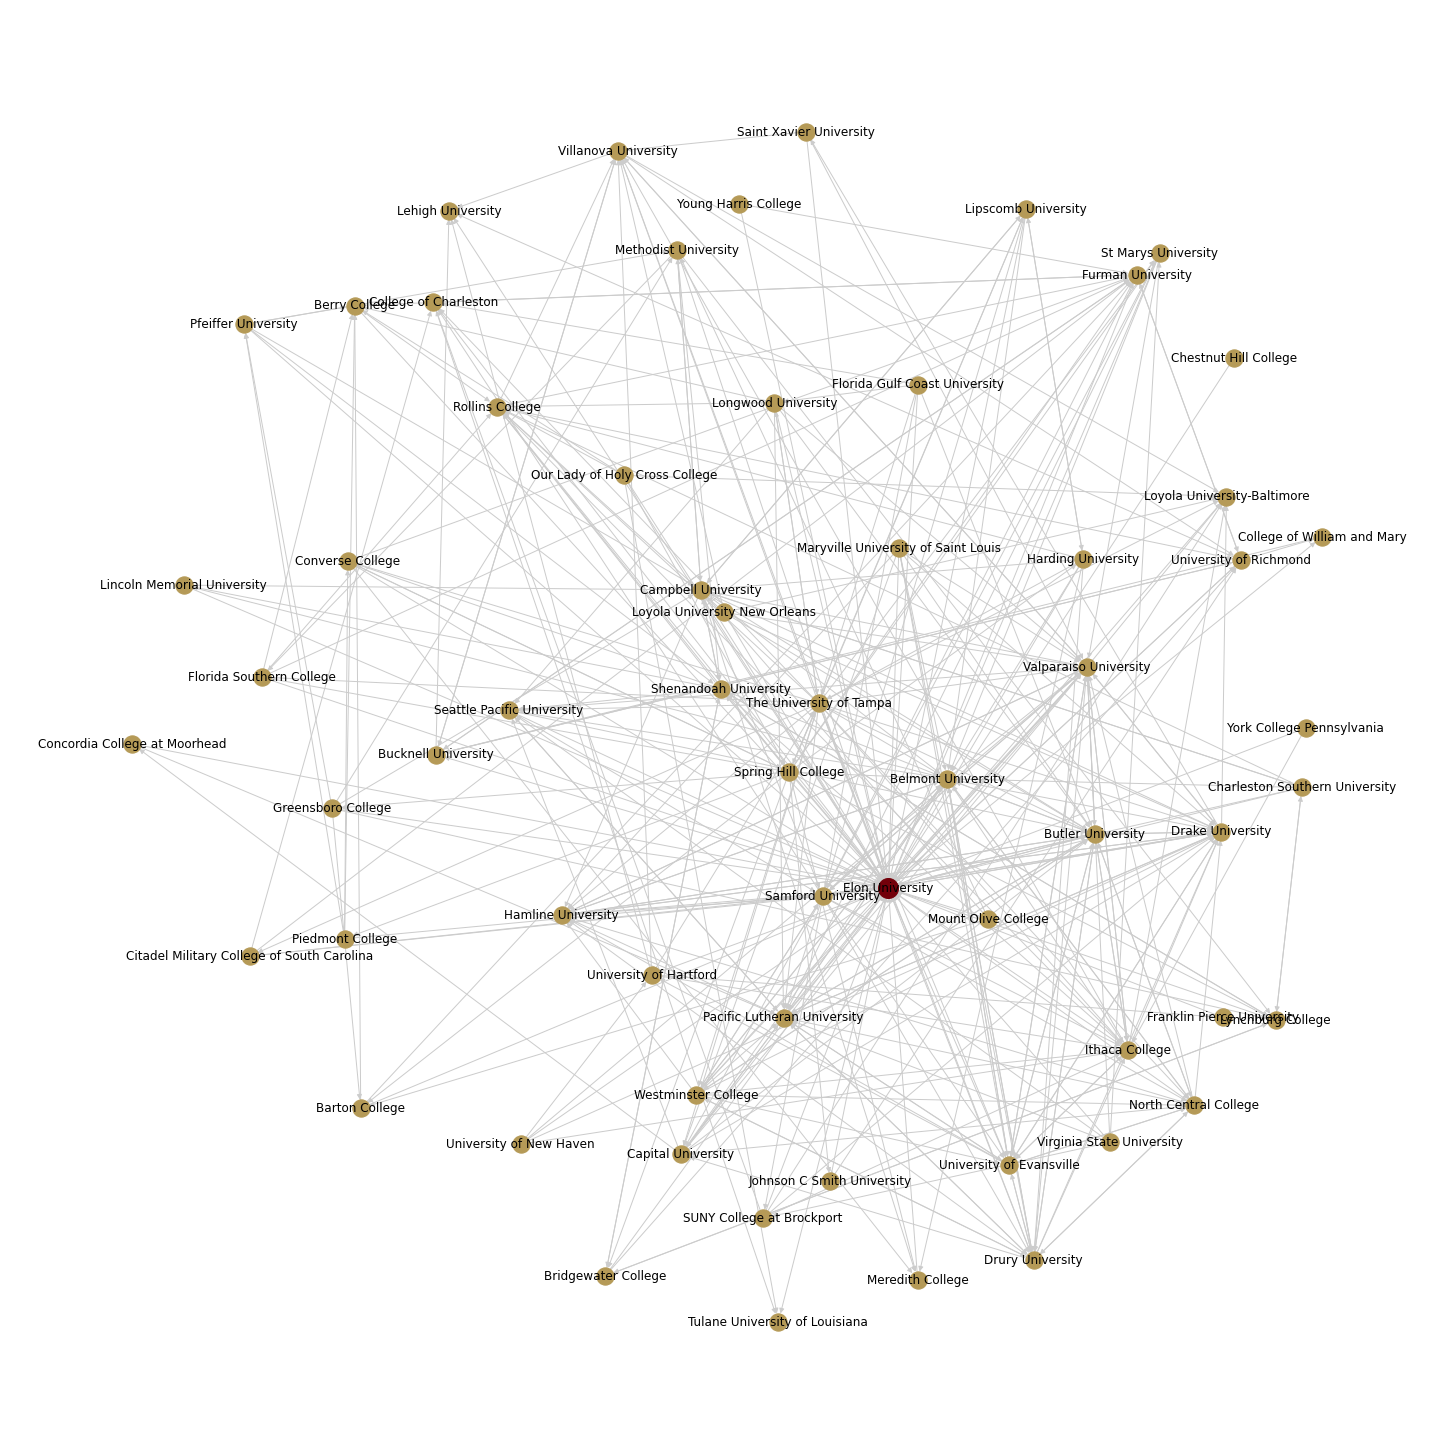

In [ ]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(E, k=1.4)
# nx.draw(E, pos=pos, node_size=15, edge_color="#333333", alpha=0.05, with_labels=True)
nx.draw(E, pos=pos, with_labels=True, edge_color="#cccccc", node_color='#b59a57')

# the spring layout contains the position of each node, in case we want to
# visualize one node in particular
elon_pos = pos['Elon University']
plt.plot(elon_pos[0], elon_pos[1], 'o', c='#73000a', markersize=20)
# plt.text(elon_pos[0], elon_pos[1], 'Elon University', size='xx-large')
plt.show()